<a href="https://colab.research.google.com/github/jialinli-21/Li_DSPN_S25/blob/main/Exercise13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 13:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository.

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

1. Loading and visualizing data 1/1
2. Logistic classifier 2/2
3. Bootstrapped accuracy 3/3
4. Permutation test for grey matter effects 3/3
5. Reflection 1/1

---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file.

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame.

In [ ]:
library(tidyverse)

system("gdown --id 1hywRmGdvhbDYTrQRyl1_bLJsq-T3GJq2")

hcp_data <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")

new_hcp <- select(hcp_data, Subject, Gender, Flanker_Unadj, FS_IntraCranial_Vol, FS_Tot_WM_Vol, FS_Total_GM_Vol)

new_hcp <- na.omit(new_hcp)

head(new_hcp)
dim(new_hcp)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>
2,100206,M,130.42,1864518,543134,807245
3,100307,F,112.56,1512540,407292,664124
4,100408,M,121.18,1684117,500417,726206
5,100610,M,126.53,1816044,512946,762308
6,101006,F,101.85,1437868,429449,579632
7,101107,M,107.04,1512727,416995,665024


[1] 1113    6

(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color).

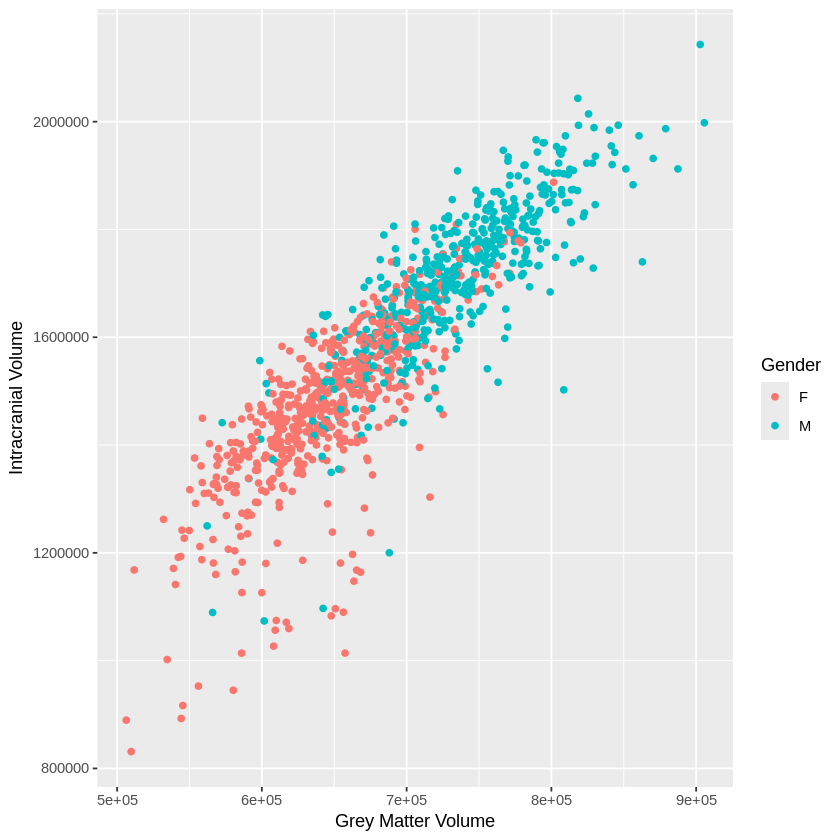

In [ ]:
library(ggplot2)
ggplot(new_hcp, aes(x = FS_Total_GM_Vol, y = FS_IntraCranial_Vol, color = Gender)) +
  geom_point() +
  labs(x = "Grey Matter Volume", y = "Intracranial Volume")



What patterns do you observe in the scatter plot?

> *Males have bigger intracranial volumns and grey matter volumns than females.*
>

---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume.

In [ ]:
install.packages("ISLR")
library(ISLR)
library(boot)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
new_hcp$Gender <- as.factor(new_hcp$Gender)
head(new_hcp)
lm.fit <- glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol,
family = binomial, data = new_hcp)
summary(lm.fit)

,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<fct>,<dbl>,<dbl>,<int>,<int>
2,100206,M,130.42,1864518,543134,807245
3,100307,F,112.56,1512540,407292,664124
4,100408,M,121.18,1684117,500417,726206
5,100610,M,126.53,1816044,512946,762308
6,101006,F,101.85,1437868,429449,579632
7,101107,M,107.04,1512727,416995,665024



Call:
glm(formula = Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, 
    family = binomial, data = new_hcp)

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.262e+01  1.347e+00 -16.787  < 2e-16 ***
FS_Tot_WM_Vol        2.140e-06  3.059e-06   0.699    0.484    
FS_Total_GM_Vol      1.959e-05  3.145e-06   6.229 4.70e-10 ***
FS_IntraCranial_Vol  5.020e-06  1.177e-06   4.263 2.01e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  919.85  on 1109  degrees of freedom
AIC: 927.85

Number of Fisher Scoring iterations: 5


Which factors are signficantly associated with gender?

> *Total grey matter volume and intracranial volume are significantly associated with gender.*
>

(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [ ]:
pred <- data.frame(predict(lm.fit, type = 'response'))
colnames(pred) = c('predProb')
pred$predProb_binary = rep("F", nrow(pred))
pred$predProb_binary[pred$predProb > 0.5] = "M"
train_acc <- mean(pred$predProb_binary== new_hcp$Gender)
train_acc


[1] 0.8203055

What is the prediction accuracy for gender from the full model?

>*The prediction accuracy for the gender from the full model is 0.820305480682839.*
>

---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model (i.e., the confidence of the correlation between $\hat{y}$ and $y$). Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.


$names
 [1] "t0"        "t"         "R"         "data"      "seed"      "statistic"
 [7] "sim"       "call"      "stype"     "strata"    "weights"  

$class
[1] "boot"

$boot_type
[1] "boot"

[1] "0.793333534851952 0.844732952120195"


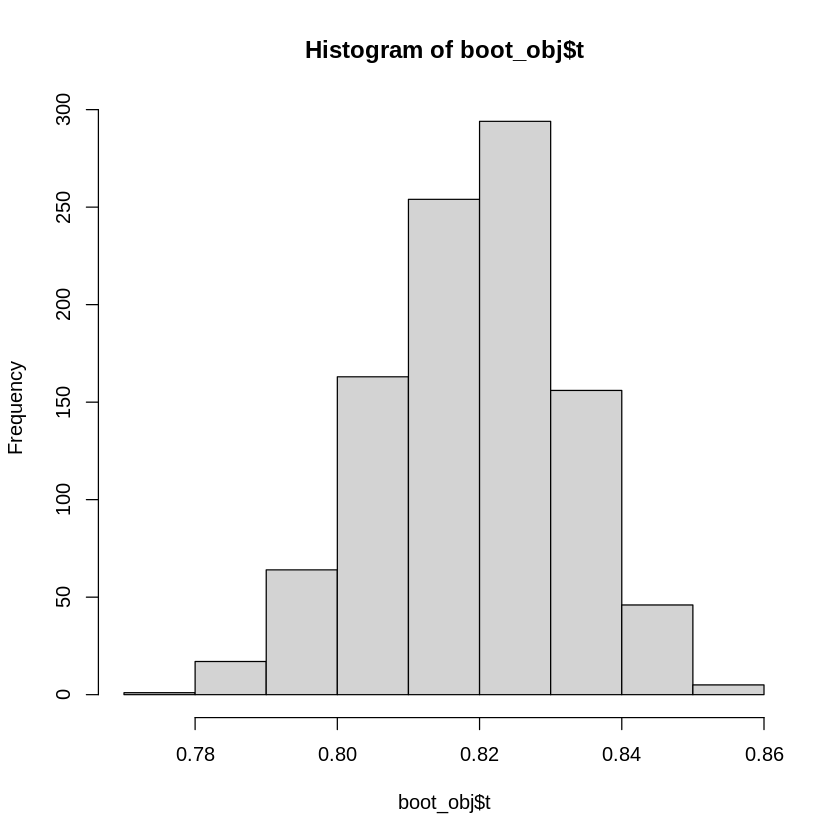

In [ ]:
# The function needs two inputs: Data, Index
boot.fn <- function(data, index){
  lm.fit <- glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol,
family = binomial, data = data,subset=index)
  pred <- data.frame(predict(lm.fit, type = 'response'))
  colnames(pred) = c('predProb')
  pred$predProb_binary = rep("F", nrow(pred))
  pred$predProb_binary[pred$predProb > 0.5] = "M"
    return(mean(pred$predProb_binary== data$Gender[index]))}

boot_obj = boot(new_hcp,boot.fn ,R=1000) #R=repetitions

attributes(boot_obj)
hist(boot_obj$t)
CI_low <- mean(boot_obj$t) - 1.96 * sd(boot_obj$t)
CI_high <- mean(boot_obj$t) + 1.96 * sd(boot_obj$t)
print(paste(CI_low, CI_high))


How robust is the prediction accuracy of the full model?

> *The 95% CI for the prediction accuracy is from 0.793 to 0.844, which shows that the prediction accuracy is very high and robust.*
>

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).

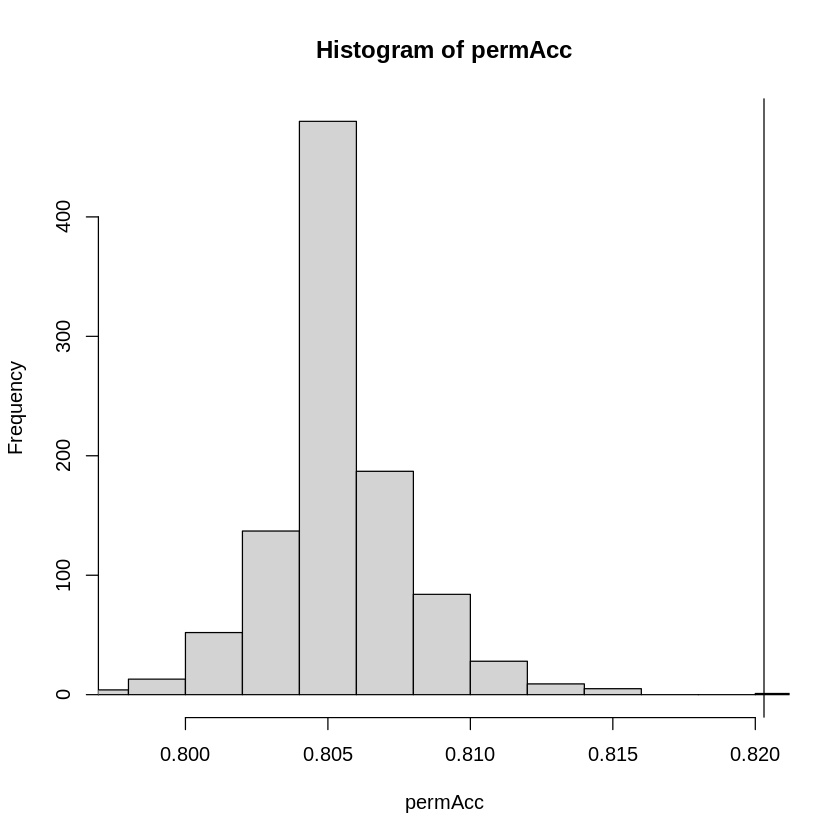

In [ ]:
permHCP = new_hcp
R=1000
permAcc = matrix(NA, nrow = R, ncol=1)
for (i in 1:R){
  permHCP$FS_Total_GM_Vol=permHCP$FS_Total_GM_Vol[sample(nrow(permHCP))]
  lm.fit <- glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol,
family = binomial, data = permHCP)
  pred <- data.frame(predict(lm.fit, type = 'response'))
  colnames(pred) = c('predProb')
  pred$predProb_binary = rep("F", nrow(pred))
  pred$predProb_binary[pred$predProb > 0.5] = "M"

  permAcc[i,] = mean(pred$predProb_binary== permHCP$Gender)
}

hist(permAcc, xlim = c(min(permAcc), train_acc))
abline(v = train_acc)


How much does the grey matter volume influence the prediction accuracy of the model?

> *The unpermuted accuracy is far away from the permuted accuracies, which means grey matter volumn highly influences the prediction accuracy of the model.*
>

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

> *Bootstrapping is the resampling method which sampling the observartions randomly in the dataset then calculated the coefficients of the model from it, while permutation test is the resampling method which creates a null distribution by randomly assigning the input to the original output.*
>*Bootstrapping is useful when you want to estimate the confidence level of the specific effects while permutation test is helpful to see how much a predictor contributes to the output.*

**DUE:** 5pm EST, March 26, 2025

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*